In [3]:
#バージョンの確認
import sys
import tensorflow as tf
sys.version, tf.__version__

('3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]',
 '2.10.0')

In [4]:
#GPU使用確認
from tensorflow.python.client import device_lib;
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2961065809118976801
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10067378176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10091708027509326672
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [5]:
#ライブラリのインストール
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10

#CV2のインストール
import cv2

In [6]:
#学習用データセットの準備
#CIFAR-10のクラストラベル
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
#とりあえず行列の形を表示
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


[6]


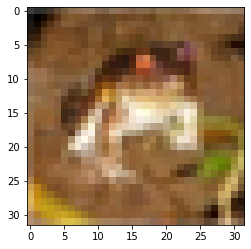

In [8]:
#とりあえず先頭を表示
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train[0])
plt.imshow(x_train[0])
plt.show()

In [9]:
x_train_temp = x_train
x_test_temp = x_test
# 画像データをfloatに型変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 画像の各画素値を 0-1 に正規化
x_train /= 255.0
x_test /= 255.0

# 教師データをone-hotベクトル化する
classes = 10
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


In [10]:
#モデルの定義
model = Sequential()
model.add(Conv2D(64, 7, activation = "relu", padding = "same", input_shape=(32,32,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(128,3, activation = "relu", padding = "same"))
model.add(MaxPool2D(2))
model.add(Conv2D(256,3, activation = "relu", padding = "same"))
model.add(Conv2D(256,3, activation = "relu", padding = "same"))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
#モデルをコンパイル
model.compile(optimizer = "sgd", loss = 'categorical_crossentropy', metrics = ["accuracy"])
#モデルの状態を表示
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [16]:
#学習
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 6s 16ms/step - loss: 1.4620 - accuracy: 0.4779 - val_loss: 1.3094 - val_accuracy: 0.5336
Epoch 2/10
352/352 [==============================] - 6s 16ms/step - loss: 1.4347 - accuracy: 0.4866 - val_loss: 1.2784 - val_accuracy: 0.5456
Epoch 3/10
352/352 [==============================] - 6s 16ms/step - loss: 1.4174 - accuracy: 0.4944 - val_loss: 1.3106 - val_accuracy: 0.5386
Epoch 4/10
352/352 [==============================] - 6s 16ms/step - loss: 1.3932 - accuracy: 0.5051 - val_loss: 1.2428 - val_accuracy: 0.5668
Epoch 5/10
352/352 [==============================] - 6s 16ms/step - loss: 1.3688 - accuracy: 0.5134 - val_loss: 1.2151 - val_accuracy: 0.5678
Epoch 6/10
352/352 [==============================] - 6s 16ms/step - loss: 1.3538 - accuracy: 0.5216 - val_loss: 1.2657 - val_accuracy: 0.5510
Epoch 7/10
352/352 [==============================] - 6s 16ms/step - loss: 1.3390 - accuracy: 0.5258 - val_loss: 1.2000 - val_accuracy: 0.5760

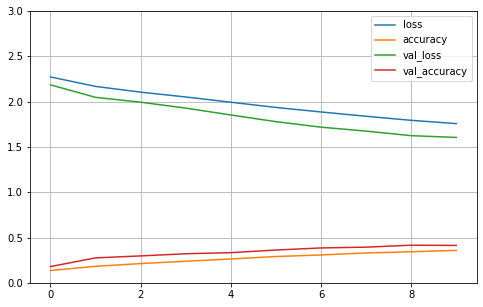

In [12]:
#訓練状況を表示する
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


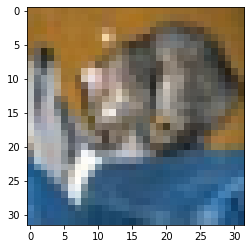

In [13]:
#とりあえずテストデータの先頭を表示
import matplotlib.pyplot as plt
%matplotlib inline

print(y_test[0,:])
plt.imshow(x_test_temp[0])
plt.show()

In [14]:
#モデルを使った予測
x_test_tmp = x_test[:1]
print(x_test_tmp.shape)
y_pred = model.predict(x_test_tmp)
print(y_pred)

(1, 32, 32, 3)
1/1 [==============================] - 0s 147ms/step
[[0.01852833 0.01329185 0.12205201 0.28056872 0.07955588 0.31773534
  0.08879405 0.04937962 0.01860568 0.01148849]]
